In [186]:
# Imports
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import os
import numpy as np
import math
from scipy.stats import pearsonr
from matplotlib import cm

from fooof import FOOOF
from fooof import FOOOFGroup

# To Do's - master version:

### Plotting
- Figure out how to plot topographies with nan values
    - Use MNE masks to select which channels will be plotted
        - Suggestion: add a check for which channels have data. Boolean select these channels & positions to pass into plotting.
- Reorganize notebook for which parts you have to re run

### Quantitative Corrs
- Set it up to measure correlation & plot scatterplot
    - Generally, for any band, any FOOOF feature 
        - First: set band & feature, run to see results (finish the generalization: get a scatter plot & corr)
        - Also: add to plot Medial -> Lateral (abs)
- Collect all R's into corr matrix
- Bonus: plot the corr matrix as a colored plot (red/blue). Hint: plt.imshow(matrix). Extra bonus: add a colorbar. 
        
### Per subject analysis
- Do the same spatial correlations, per subject, collect distributions of r-vals & p-vals
- Plot: boxplots of the R-values, across subjects

### Band to Band Correlations
- Amplitude-amplitude correlations between bands (across channels)
- Plot: corr-matrix

In [ ]:
# LOAD STUFF

In [138]:
save_path = '/Users/luyandamdanda/Research/Results'
chan_dat = 'channel_dat.txt'

chan_file = os.path.join(save_path, chan_dat)

In [84]:
# for band in bands:
#     band.append('_cfs') = flattened_alpha[:, 0]
#     band.append('_amps') = flattened_alpha[:, 1]
#     band.append('_bws')= flattened_alpha[:, 2]

In [87]:
# POTENTIAL DATA ORGANIZATION
#  HOWEVER _ LETS NOT
class OscDat(object):
    
    def __init__(self):
        self.cf = None
        self.amp = None
        self.bw = None

        
osc_bands = []
bands = ['T', 'A', 'B', 'M']
for band in bands:
    # Initialize
    temp = OscDat()
    # Add data
    # TODO
    # Add to lst
    osc_bands.append(temp)

In [ ]:
# DATA SET UP

In [88]:
theta_data = np.load('theta_group.npy')
alpha_data = np.load('alpha_group.npy')
beta_data = np.load('beta_group.npy')
misc_data = np.load('misc_group.npy')

In [93]:
flattened_theta = np.nanmean(theta_data, axis=2)
flattened_alpha = np.nanmean(alpha_data, axis=2)
flattened_beta = np.nanmean(beta_data, axis=2)
flattened_misc = np.nanmean(misc_data, axis=2)

/Users/luyandamdanda/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/luyandamdanda/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [139]:
# Settings - put stuff here
bands = {
    'theta' : flattened_theta,
    'alpha' : flattened_alpha,
    'beta' : flattened_beta,
    'misc' : flattened_misc,
}
# feature 0:cfs 1:amps 2:bws 
features = {
    'CFS' : 0,
    'AMPS' : 1,
    'BWS' : 2,
}

In [ ]:
# CHANNEL SET UP

In [ ]:
# Load
f = open(chan_file, 'r')
ch_names = f.read().splitlines()
f.close()
# Plot stuff (don't have to change)
montage = mne.channels.read_montage('standard_1020', ch_names)
pos = montage.get_pos2d()
# Average

# TOPOPLOTS

In [211]:
band = 'theta'
feature = 'CFS'

In [ ]:
def mask_nan_array(dat, pos):
    #Masking
    bool_arr = [True] * len(pos)
    #To updated to select channels 
    for idx, bool_ind in enumerate(bool_arr):
        if math.isnan(bands[band][:,features[feature]][idx]):
            bool_arr[idx] = False
    return m_dat, m_pos

In [213]:
#Masking
bool_arr = [True] * len(pos)
#To updated to select channels 
for idx, bool_ind in enumerate(bool_arr):
    if math.isnan(bands[band][:,features[feature]][idx]):
        bool_arr[idx] = False

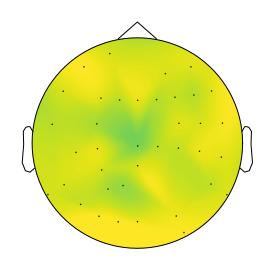

In [204]:
# Hack for selecting channels - to fix
plot = mne.viz.plot_topomap(bands[band][:,features[feature]][bool_arr], pos[bool_arr], cmap=cm.viridis, contours=0)

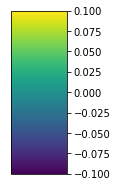

In [210]:
fig = plt.figure(figsize=(1, 3))

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=bands[band][:,features[feature]].min(), vmax=bands[band][:,features[feature]].max())
cb = mpl.colorbar.ColorbarBase(plt.gca(), cmap=cmap, norm=norm, orientation='vertical')

# SPATIAL CORRELATIONS: Position & Band Features

In [ ]:
# Correlations & Plots
# Average feature value at each channel
# For posterior -> anterior
# Check: left -> right
# Check: Medial -> lateral

In [215]:
dat = bands[band][:,features[feature]]

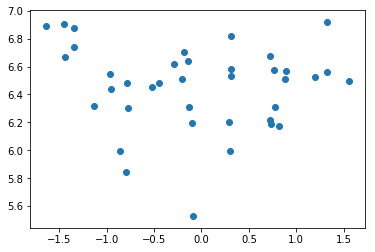

In [216]:
# Scatter plots
plt.scatter(pos[:, 1], dat)

In [ ]:
pearsonr(mask_nan_array(dat, pos))

In [217]:
pearsonr(pos[:, 1], dat)
# (correlation value(r-value), p-value)

(nan, 1.0)

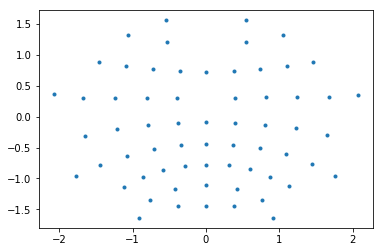

In [147]:
plt.plot(pos[:, 0], pos[:, 1], '.')
#0 - x -> left to right
#1 - y -> Posterior to anterior

In [162]:
np.array([["_", "CF","AMPS","BW"], ['_', 'theta','alpha','be']])

SyntaxError: invalid syntax (<ipython-input-162-be7de7212f7a>, line 1)

In [ ]:
# Correlation Matrix
#  Each matrix: rows are bands, columns are FOOOF features
#    Each value is the corr value (r) between the data of that Band & Feature to a spatial dimension
#    There is a corr-matrix for each spatial dim
# Bonus: plot the matrix in colours.

## Spatial Correlations: Per Subject level

Run the same correlations as above (ex. CF per channel), per subject
Collect the distributions of R values

In [ ]:
alpha_data.shape
rs = []; ps = []
for si in range(13):
    a_cf = alpha_data[:, 0, si]
    print(pearsonr(a_cf, pos[:, 1]))

In [175]:
rs = [0.1, 0.2, 0.1, 0.0]

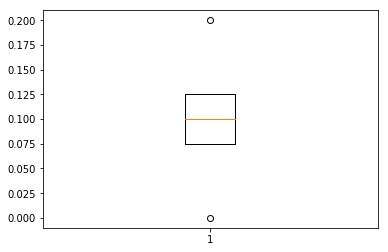

In [177]:
plt.boxplot(rs);

# Spatial Correlations Between Bands

In [182]:
d1 = dat = bands['alpha'][:,features['AMPS']]
d2 = dat = bands['beta'][:,features['AMPS']]

In [180]:
pearsonr(d1, d2)

(0.14965112404474487, 0.23789151103575285)

In [ ]:
th = [nan, 1, 1, nan]
al  = [1.3, 1.2, 1.5, 1.4]
#make boolean array so that you ma th's 1 and 1 with al's 1.2 1.2
#onces extracted -> index position in reference to origial array doesnt matter
#if a value at index n for 